Сгенерированный датасет с с расстоянием между группами в 10^3 раз больше, чем диаметр группы

In [351]:
import time

# Data analysis
import numpy as np

# Visualization
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
%matplotlib inline

# Models and tools
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import pairwise_distances_argmin
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

X, y = make_blobs(n_samples=100, n_features=2, centers=5, cluster_std=0.6, random_state=20)

Нарисуем созданные нами капли, чтобы увидеть, сможем ли мы легко идентифицировать кластеры в нашем наборе данных

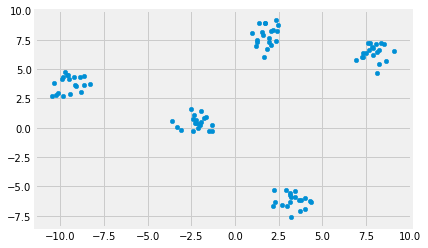

In [352]:
def plot_clusters(X, clusters=None, centers=None):
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=20)

    # Plot the centers if they are identified
    if np.any(centers):
        plt.scatter(
            centers[:, 0], centers[:, 1], marker="x", s=100, linewidths=10, color="r"
        )
plot_clusters(X)

Отобразим метрики

In [389]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn import metrics
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
clusters = kmeans.predict(X)
print('adjusted_rand_score: {}'.format(adjusted_rand_score(y, kmeans.fit(X).labels_)))
print('Shows how many elements stayed together after clusterization')
print('jaccard_score: {}'.format(jaccard_score(y, kmeans.fit(X).labels_, average = 'micro')))
print('Shows percentage of true predicted labels')
print('fowlkes_mallows_score: {}'.format(fowlkes_mallows_score(y, kmeans.fit(X).labels_)))
print('Shows how much predicted clusters look like true ones')
print('silhouette_score: {}'.format(silhouette_score(X, kmeans.fit(X).labels_)))

adjusted_rand_score: 0.18846510946051603
Shows how many elements stayed together after clusterization
jaccard_score: 0.11731843575418995
Shows percentage of true predicted labels
fowlkes_mallows_score: 0.36274992122499167
Shows how much predicted clusters look like true ones
silhouette_score: 0.378271142097509


Визуализируем результаты, выделив кластеры, идентифицированные алгоритмом, разными цветами. Мы также наносим на график центры кластеров, отмеченные красным крестом.

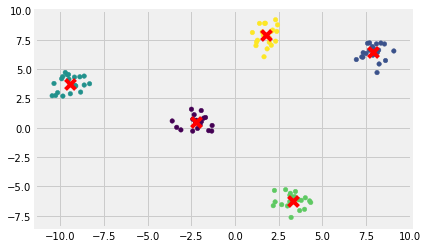

In [354]:
centers = kmeans.cluster_centers_

plot_clusters(X, clusters=clusters, centers=centers)

Запустим алгоритм K-средних для 1, 3, 5 и 10 итераций, чтобы увидеть, как перемещаются центроиды.

In [355]:
def kmeans_iter(X, iterations, n_clusters=5):
    kmeans = KMeans(
        n_clusters=n_clusters,
        init="random",
        n_init=1,
        algorithm="full",
        max_iter=iterations,
        random_state=10,
    )
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    return clusters, centers

Text(0.5, 1.0, 'Centroids after 10 iterations')

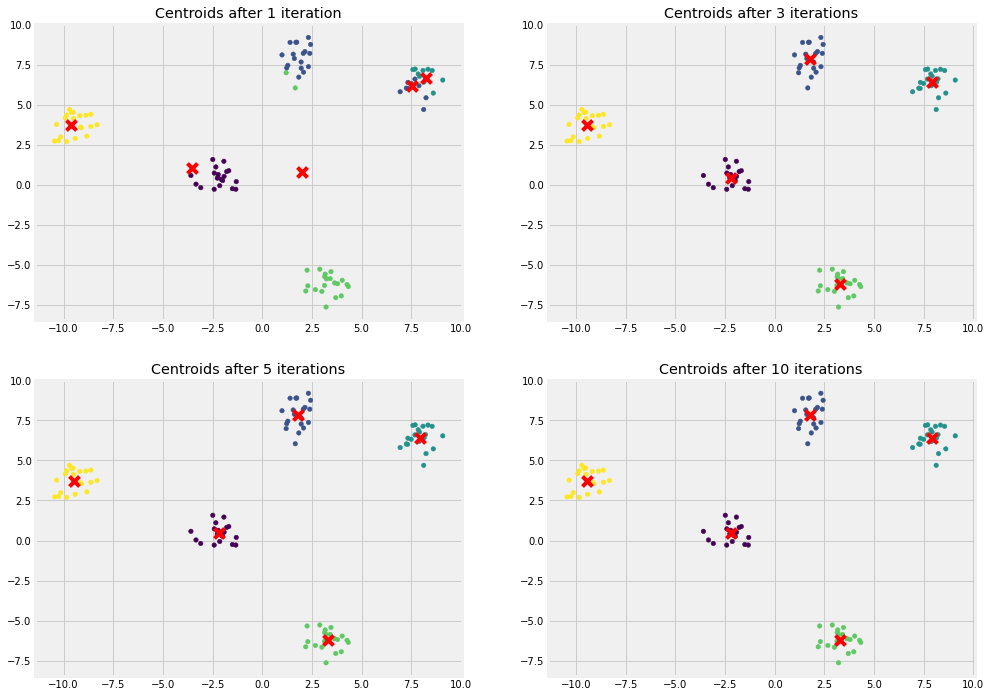

In [356]:
iter_1, centers_1 = kmeans_iter(X, 1)
iter_3, centers_3 = kmeans_iter(X, 3)
iter_5, centers_5 = kmeans_iter(X, 5)
iter_10, centers_10 = kmeans_iter(X, 10)

fig = plt.figure(figsize=[15, 12])

plt.subplot(221)
plot_clusters(X, clusters=iter_1, centers=centers_1)
plt.title("Centroids after 1 iteration")

plt.subplot(222)
plot_clusters(X, clusters=iter_3, centers=centers_3)
plt.title("Centroids after 3 iterations")

plt.subplot(223)
plot_clusters(X, clusters=iter_5, centers=centers_5)
plt.title("Centroids after 5 iterations")

plt.subplot(224)
plot_clusters(X, clusters=iter_10, centers=centers_10)
plt.title("Centroids after 10 iterations")

Отображаем иерархическую кластеризацию

In [357]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

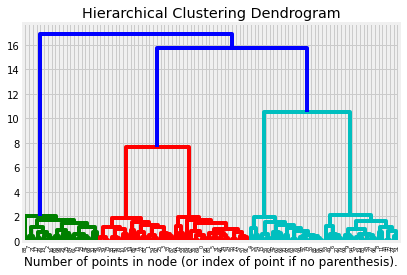

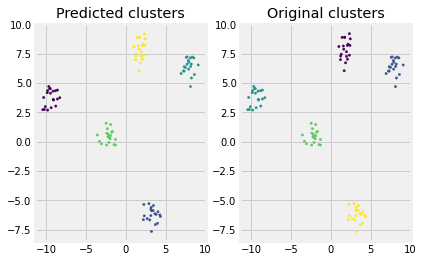

In [358]:
model = AgglomerativeClustering(distance_threshold=7, n_clusters=None, affinity='manhattan', linkage='average')
model = model.fit(X)
plt.figure('Dendrogram')
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.figure('Elements')
plt.subplot(1, 2, 1)
plt.title('Predicted clusters')
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=5)

plt.subplot(1, 2, 2)
plt.title('Original clusters')
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
plt.show()

Далее сгенерированный датасет, где группы расположены близко или касаются друг друга. Повторяем те же шаги 

In [359]:
X, y = make_blobs(n_samples=100, n_features=2, centers=5, cluster_std=2, random_state=20)

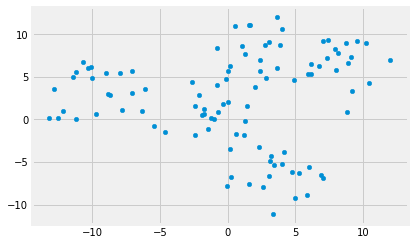

In [360]:
def plot_clusters(X, clusters=None, centers=None):
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=20)

    # Plot the centers if they are identified
    if np.any(centers):
        plt.scatter(
            centers[:, 0], centers[:, 1], marker="x", s=100, linewidths=10, color="r"
        )
plot_clusters(X)

In [361]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
clusters = kmeans.predict(X)
print('adjusted_rand_score: {}'.format(adjusted_rand_score(y, kmeans.fit(X).labels_)))
print('Shows how many elements stayed together after clusterization')
print('jaccard_score: {}'.format(jaccard_score(y, kmeans.fit(X).labels_, average = 'micro')))
print('Shows percentage of true predicted labels')
print('fowlkes_mallows_score: {}'.format(fowlkes_mallows_score(y, kmeans.fit(X).labels_)))
print('Shows how much predicted clusters look like true ones')
print('silhouette_score: {}'.format(silhouette_score(X, kmeans.fit(X).labels_)))

adjusted_rand_score: 0.9245079607157413
Shows how many elements stayed together after clusterization
jaccard_score: 0.005025125628140704
Shows percentage of true predicted labels
fowlkes_mallows_score: 0.9390120859067744
Shows how much predicted clusters look like true ones


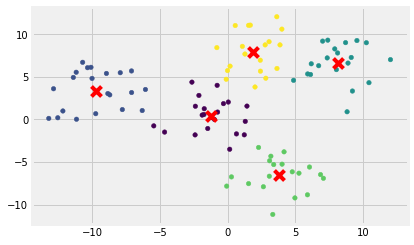

In [362]:
centers = kmeans.cluster_centers_

plot_clusters(X, clusters=clusters, centers=centers)

In [363]:
def kmeans_iter(X, iterations, n_clusters=5):
    kmeans = KMeans(
        n_clusters=n_clusters,
        init="random",
        n_init=1,
        algorithm="full",
        max_iter=iterations,
        random_state=10,
    )
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    return clusters, centers

Text(0.5, 1.0, 'Centroids after 10 iterations')

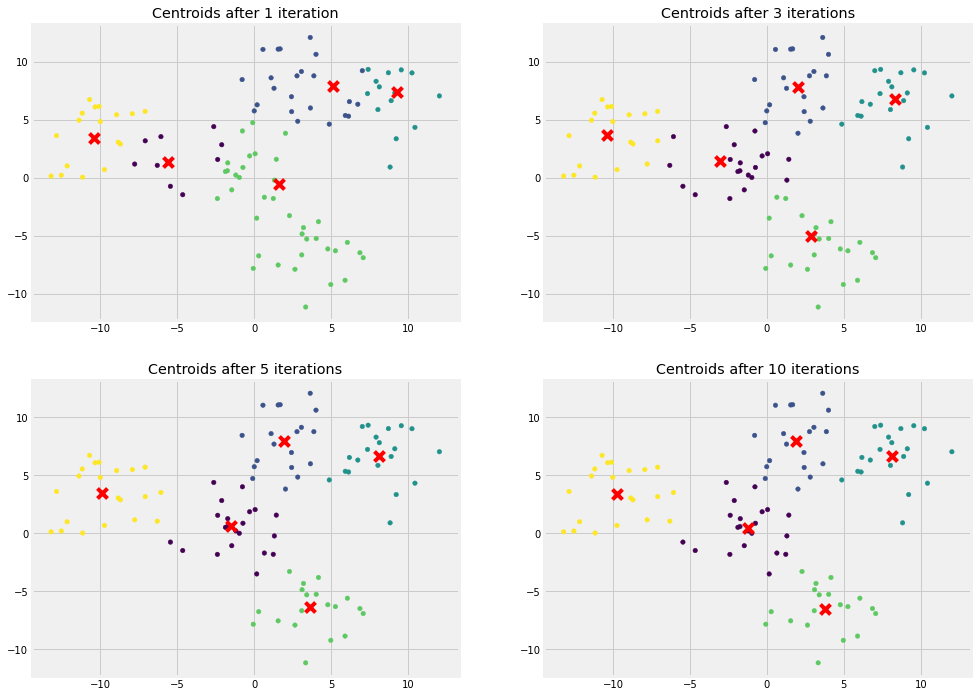

In [364]:
iter_1, centers_1 = kmeans_iter(X, 1)
iter_3, centers_3 = kmeans_iter(X, 3)
iter_5, centers_5 = kmeans_iter(X, 5)
iter_10, centers_10 = kmeans_iter(X, 10)

fig = plt.figure(figsize=[15, 12])

plt.subplot(221)
plot_clusters(X, clusters=iter_1, centers=centers_1)
plt.title("Centroids after 1 iteration")

plt.subplot(222)
plot_clusters(X, clusters=iter_3, centers=centers_3)
plt.title("Centroids after 3 iterations")

plt.subplot(223)
plot_clusters(X, clusters=iter_5, centers=centers_5)
plt.title("Centroids after 5 iterations")

plt.subplot(224)
plot_clusters(X, clusters=iter_10, centers=centers_10)
plt.title("Centroids after 10 iterations")

In [365]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

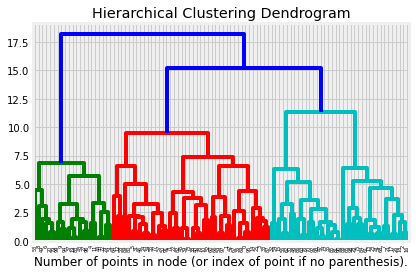

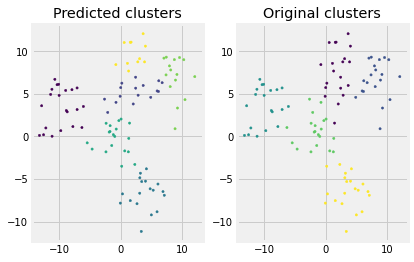

In [366]:
model = AgglomerativeClustering(distance_threshold=7, n_clusters=None, affinity='manhattan', linkage='average')
model = model.fit(X)
plt.figure('Dendrogram')
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.figure('Elements')
plt.subplot(1, 2, 1)
plt.title('Predicted clusters')
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=5)

plt.subplot(1, 2, 2)
plt.title('Original clusters')
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
plt.show()

Далее датасет, где средняя площадь пересечения классов 10-20%

In [367]:
X, y = make_blobs(n_samples=100, n_features=2, centers=5, cluster_std=4.7, random_state=20)

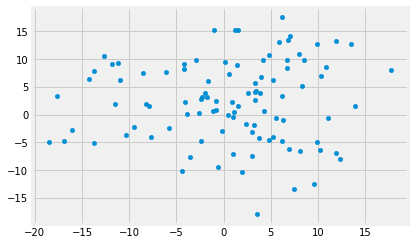

In [368]:
def plot_clusters(X, clusters=None, centers=None):
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=20)

    # Plot the centers if they are identified
    if np.any(centers):
        plt.scatter(
            centers[:, 0], centers[:, 1], marker="x", s=100, linewidths=10, color="r"
        )
plot_clusters(X)

In [369]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
clusters = kmeans.predict(X)
print('adjusted_rand_score: {}'.format(adjusted_rand_score(y, kmeans.fit(X).labels_)))
print('Shows how many elements stayed together after clusterization')
print('jaccard_score: {}'.format(jaccard_score(y, kmeans.fit(X).labels_, average = 'micro')))
print('Shows percentage of true predicted labels')
print('fowlkes_mallows_score: {}'.format(fowlkes_mallows_score(y, kmeans.fit(X).labels_)))
print('Shows how much predicted clusters look like true ones')
print('silhouette_score: {}'.format(silhouette_score(X, kmeans.fit(X).labels_)))

adjusted_rand_score: 0.2664182054322661
Shows how many elements stayed together after clusterization
jaccard_score: 0.08695652173913043
Shows percentage of true predicted labels
fowlkes_mallows_score: 0.41638277222178144
Shows how much predicted clusters look like true ones


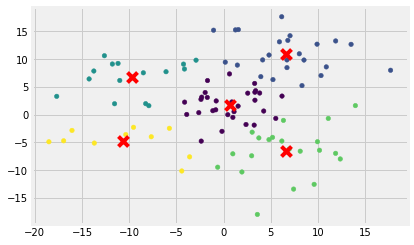

In [370]:
centers = kmeans.cluster_centers_

plot_clusters(X, clusters=clusters, centers=centers)

In [371]:
def kmeans_iter(X, iterations, n_clusters=5):
    kmeans = KMeans(
        n_clusters=n_clusters,
        init="random",
        n_init=1,
        algorithm="full",
        max_iter=iterations,
        random_state=10,
    )
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    return clusters, centers

Text(0.5, 1.0, 'Centroids after 10 iterations')

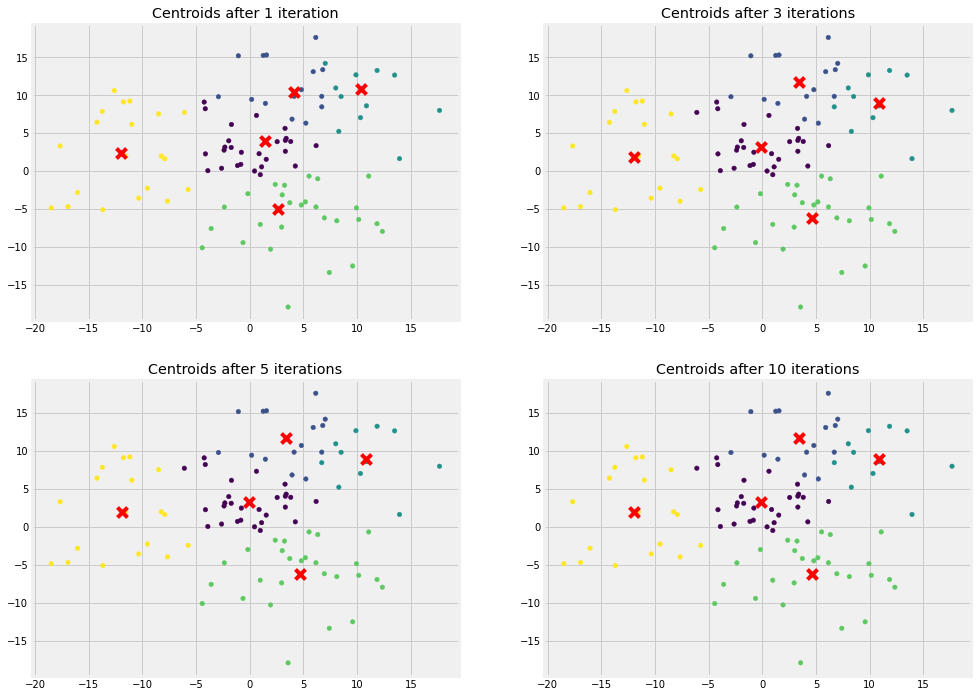

In [372]:
iter_1, centers_1 = kmeans_iter(X, 1)
iter_3, centers_3 = kmeans_iter(X, 3)
iter_5, centers_5 = kmeans_iter(X, 5)
iter_10, centers_10 = kmeans_iter(X, 10)

fig = plt.figure(figsize=[15, 12])

plt.subplot(221)
plot_clusters(X, clusters=iter_1, centers=centers_1)
plt.title("Centroids after 1 iteration")

plt.subplot(222)
plot_clusters(X, clusters=iter_3, centers=centers_3)
plt.title("Centroids after 3 iterations")

plt.subplot(223)
plot_clusters(X, clusters=iter_5, centers=centers_5)
plt.title("Centroids after 5 iterations")

plt.subplot(224)
plot_clusters(X, clusters=iter_10, centers=centers_10)
plt.title("Centroids after 10 iterations")

In [373]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

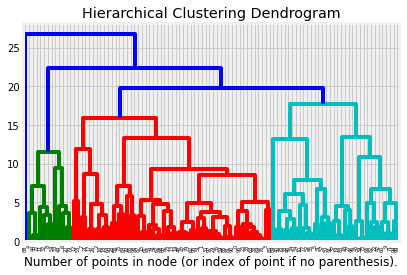

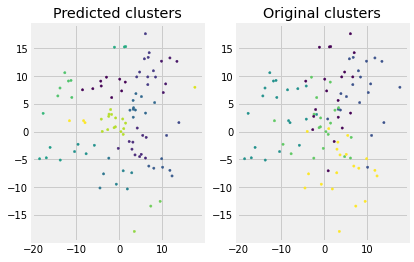

In [374]:
model = AgglomerativeClustering(distance_threshold=7, n_clusters=None, affinity='manhattan', linkage='average')
model = model.fit(X)
plt.figure('Dendrogram')
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.figure('Elements')
plt.subplot(1, 2, 1)
plt.title('Predicted clusters')
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=5)

plt.subplot(1, 2, 2)
plt.title('Original clusters')
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
plt.show()

Далее датасет, где средняя площадь пересечения классов 50-70%

In [375]:
X, y = make_blobs(n_samples=100, n_features=2, centers=5, cluster_std=6, random_state=20)

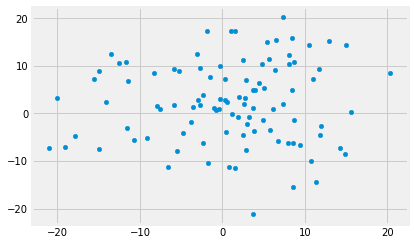

In [376]:
def plot_clusters(X, clusters=None, centers=None):
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=20)

    # Plot the centers if they are identified
    if np.any(centers):
        plt.scatter(
            centers[:, 0], centers[:, 1], marker="x", s=100, linewidths=10, color="r"
        )
plot_clusters(X)

In [377]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
clusters = kmeans.predict(X)
print('adjusted_rand_score: {}'.format(adjusted_rand_score(y, kmeans.fit(X).labels_)))
print('Shows how many elements stayed together after clusterization')
print('jaccard_score: {}'.format(jaccard_score(y, kmeans.fit(X).labels_, average = 'micro')))
print('Shows percentage of true predicted labels')
print('fowlkes_mallows_score: {}'.format(fowlkes_mallows_score(y, kmeans.fit(X).labels_)))
print('Shows how much predicted clusters look like true ones')
print('silhouette_score: {}'.format(silhouette_score(X, kmeans.fit(X).labels_)))

adjusted_rand_score: 0.1955104996379435
Shows how many elements stayed together after clusterization
jaccard_score: 0.14942528735632185
Shows percentage of true predicted labels
fowlkes_mallows_score: 0.3446511173283474
Shows how much predicted clusters look like true ones


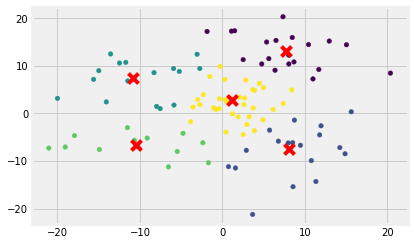

In [378]:
centers = kmeans.cluster_centers_

plot_clusters(X, clusters=clusters, centers=centers)

In [379]:
def kmeans_iter(X, iterations, n_clusters=5):
    kmeans = KMeans(
        n_clusters=n_clusters,
        init="random",
        n_init=1,
        algorithm="full",
        max_iter=iterations,
        random_state=10,
    )
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    return clusters, centers

Text(0.5, 1.0, 'Centroids after 10 iterations')

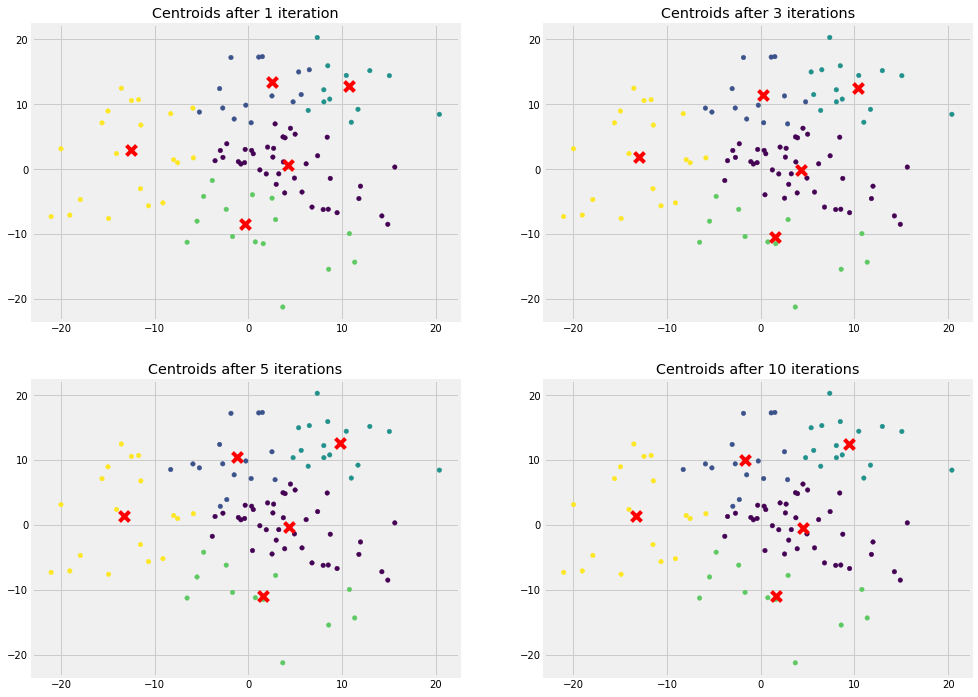

In [380]:
iter_1, centers_1 = kmeans_iter(X, 1)
iter_3, centers_3 = kmeans_iter(X, 3)
iter_5, centers_5 = kmeans_iter(X, 5)
iter_10, centers_10 = kmeans_iter(X, 10)

fig = plt.figure(figsize=[15, 12])

plt.subplot(221)
plot_clusters(X, clusters=iter_1, centers=centers_1)
plt.title("Centroids after 1 iteration")

plt.subplot(222)
plot_clusters(X, clusters=iter_3, centers=centers_3)
plt.title("Centroids after 3 iterations")

plt.subplot(223)
plot_clusters(X, clusters=iter_5, centers=centers_5)
plt.title("Centroids after 5 iterations")

plt.subplot(224)
plot_clusters(X, clusters=iter_10, centers=centers_10)
plt.title("Centroids after 10 iterations")

In [381]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

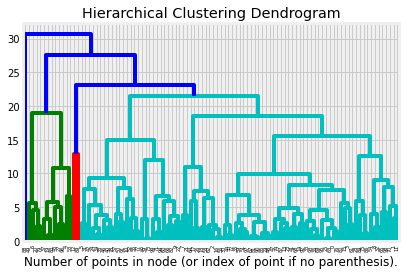

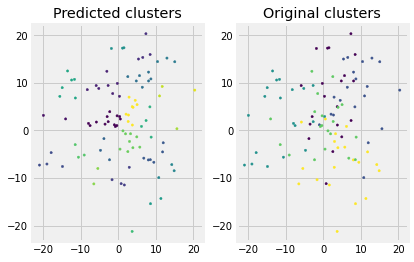

In [382]:
model = AgglomerativeClustering(distance_threshold=7, n_clusters=None, affinity='manhattan', linkage='average')
model = model.fit(X)
plt.figure('Dendrogram')
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.figure('Elements')
plt.subplot(1, 2, 1)
plt.title('Predicted clusters')
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=5)

plt.subplot(1, 2, 2)
plt.title('Original clusters')
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
plt.show()